<a href="https://colab.research.google.com/github/roshantac/ERA/blob/main/Session09/Cifar_using_custom_model_albumentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!git clone https://github.com/roshantac/ERA.git
!cp ERA/Session09/*.py .

fatal: destination path 'ERA' already exists and is not an empty directory.


In [2]:
ls

base_functions.py  dataset.py  model.py      sample_data/
data/              ERA/        __pycache__/  train_test_val.py


In [1]:
!nvidia-smi

Tue Jul 18 14:59:17 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
%matplotlib inline
!pip install torchsummary

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms

#Import DataSet


In [5]:
from dataset import *
trainloader, testloader, testloader2, classes = get_data_alb()

/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/dropout/cutout.py:50: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


#Device

In [9]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


# Model with batch normalisation

In [10]:
import torch
from model import Net_depth_dialated
model = Net_depth_dialated().to(device)

# Summary


In [11]:

from torchsummary import summary

summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 48, 32, 32]          13,824
              ReLU-6           [-1, 48, 32, 32]               0
       BatchNorm2d-7           [-1, 48, 32, 32]              96
           Dropout-8           [-1, 48, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          27,648
             ReLU-10           [-1, 64, 32, 32]               0
      BatchNorm2d-11           [-1, 64, 32, 32]             128
          Dropout-12           [-1, 64, 32, 32]               0
           Conv2d-13           [-1, 32, 32, 32]           2,048
           Conv2d-14           [-1, 32,

# Training with Batch norm model

In [12]:
from train_test_val import train_test_evaluate

TTE=train_test_evaluate()
#Training(3,model)
TTE.Training(40,model,device, trainloader, testloader,0.1 )


EPOCH: 0


Loss=1.4743826389312744 Batch_id=499 Accuracy=40.10: 100%|██████████| 500/500 [00:22<00:00, 21.98it/s]



Test set: Average loss: 0.0131, Accuracy: 5198/10000 (51.98%)

EPOCH: 1


Loss=1.1112847328186035 Batch_id=499 Accuracy=52.80: 100%|██████████| 500/500 [00:22<00:00, 21.93it/s]



Test set: Average loss: 0.0114, Accuracy: 5978/10000 (59.78%)

EPOCH: 2


Loss=1.1380009651184082 Batch_id=499 Accuracy=58.92: 100%|██████████| 500/500 [00:22<00:00, 21.89it/s]



Test set: Average loss: 0.0096, Accuracy: 6548/10000 (65.48%)

EPOCH: 3


Loss=1.0425915718078613 Batch_id=499 Accuracy=61.99: 100%|██████████| 500/500 [00:23<00:00, 21.57it/s]



Test set: Average loss: 0.0094, Accuracy: 6752/10000 (67.52%)

EPOCH: 4


Loss=0.9381524920463562 Batch_id=499 Accuracy=64.24: 100%|██████████| 500/500 [00:22<00:00, 21.77it/s]



Test set: Average loss: 0.0087, Accuracy: 7055/10000 (70.55%)

EPOCH: 5


Loss=0.9383737444877625 Batch_id=499 Accuracy=65.39: 100%|██████████| 500/500 [00:22<00:00, 21.97it/s]



Test set: Average loss: 0.0094, Accuracy: 6785/10000 (67.85%)

EPOCH: 6


Loss=0.7060094475746155 Batch_id=499 Accuracy=68.16: 100%|██████████| 500/500 [00:22<00:00, 22.19it/s]



Test set: Average loss: 0.0076, Accuracy: 7424/10000 (74.24%)

EPOCH: 7


Loss=0.7095829844474792 Batch_id=499 Accuracy=70.15: 100%|██████████| 500/500 [00:21<00:00, 23.47it/s]



Test set: Average loss: 0.0073, Accuracy: 7550/10000 (75.50%)

EPOCH: 8


Loss=0.7207172513008118 Batch_id=499 Accuracy=71.76: 100%|██████████| 500/500 [00:21<00:00, 23.80it/s]



Test set: Average loss: 0.0077, Accuracy: 7380/10000 (73.80%)

EPOCH: 9


Loss=0.6678775548934937 Batch_id=499 Accuracy=72.63: 100%|██████████| 500/500 [00:20<00:00, 24.09it/s]



Test set: Average loss: 0.0077, Accuracy: 7407/10000 (74.07%)

EPOCH: 10


Loss=0.8024839758872986 Batch_id=499 Accuracy=73.46: 100%|██████████| 500/500 [00:21<00:00, 23.44it/s]



Test set: Average loss: 0.0064, Accuracy: 7827/10000 (78.27%)

EPOCH: 11


Loss=0.7255492210388184 Batch_id=499 Accuracy=74.37: 100%|██████████| 500/500 [00:21<00:00, 23.69it/s]



Test set: Average loss: 0.0063, Accuracy: 7878/10000 (78.78%)

EPOCH: 12


Loss=0.8442137241363525 Batch_id=499 Accuracy=75.81: 100%|██████████| 500/500 [00:21<00:00, 23.79it/s]



Test set: Average loss: 0.0059, Accuracy: 8016/10000 (80.16%)

EPOCH: 13


Loss=0.4920561909675598 Batch_id=499 Accuracy=76.30: 100%|██████████| 500/500 [00:21<00:00, 23.70it/s]



Test set: Average loss: 0.0059, Accuracy: 8073/10000 (80.73%)

EPOCH: 14


Loss=0.7416973114013672 Batch_id=499 Accuracy=76.76: 100%|██████████| 500/500 [00:20<00:00, 24.37it/s]



Test set: Average loss: 0.0057, Accuracy: 8054/10000 (80.54%)

EPOCH: 15


Loss=0.5861825346946716 Batch_id=499 Accuracy=77.24: 100%|██████████| 500/500 [00:20<00:00, 24.76it/s]



Test set: Average loss: 0.0059, Accuracy: 8001/10000 (80.01%)

EPOCH: 16


Loss=0.5083772540092468 Batch_id=499 Accuracy=77.50: 100%|██████████| 500/500 [00:20<00:00, 23.82it/s]



Test set: Average loss: 0.0056, Accuracy: 8146/10000 (81.46%)

EPOCH: 17


Loss=0.640362024307251 Batch_id=499 Accuracy=78.66: 100%|██████████| 500/500 [00:21<00:00, 23.73it/s]



Test set: Average loss: 0.0056, Accuracy: 8082/10000 (80.82%)

EPOCH: 18


Loss=0.4875161051750183 Batch_id=499 Accuracy=79.16: 100%|██████████| 500/500 [00:20<00:00, 23.90it/s]



Test set: Average loss: 0.0058, Accuracy: 8181/10000 (81.81%)

EPOCH: 19


Loss=0.4567331373691559 Batch_id=499 Accuracy=79.35: 100%|██████████| 500/500 [00:21<00:00, 23.63it/s]



Test set: Average loss: 0.0057, Accuracy: 8081/10000 (80.81%)

EPOCH: 20


Loss=0.574032187461853 Batch_id=499 Accuracy=79.96: 100%|██████████| 500/500 [00:20<00:00, 24.53it/s]



Test set: Average loss: 0.0051, Accuracy: 8276/10000 (82.76%)

EPOCH: 21


Loss=0.6897468566894531 Batch_id=499 Accuracy=80.67: 100%|██████████| 500/500 [00:20<00:00, 23.82it/s]



Test set: Average loss: 0.0055, Accuracy: 8161/10000 (81.61%)

EPOCH: 22


Loss=0.529390275478363 Batch_id=499 Accuracy=80.82: 100%|██████████| 500/500 [00:21<00:00, 23.35it/s]



Test set: Average loss: 0.0047, Accuracy: 8403/10000 (84.03%)

EPOCH: 23


Loss=0.6867049932479858 Batch_id=499 Accuracy=81.00: 100%|██████████| 500/500 [00:21<00:00, 23.34it/s]



Test set: Average loss: 0.0046, Accuracy: 8415/10000 (84.15%)

EPOCH: 24


Loss=0.6486203074455261 Batch_id=499 Accuracy=81.44: 100%|██████████| 500/500 [00:21<00:00, 23.34it/s]



Test set: Average loss: 0.0048, Accuracy: 8394/10000 (83.94%)

EPOCH: 25


Loss=0.39938899874687195 Batch_id=499 Accuracy=81.88: 100%|██████████| 500/500 [00:21<00:00, 23.43it/s]



Test set: Average loss: 0.0045, Accuracy: 8517/10000 (85.17%)

EPOCH: 26


Loss=0.4880765974521637 Batch_id=499 Accuracy=82.21: 100%|██████████| 500/500 [00:22<00:00, 22.65it/s]



Test set: Average loss: 0.0043, Accuracy: 8528/10000 (85.28%)

EPOCH: 27


Loss=0.7026670575141907 Batch_id=499 Accuracy=82.27: 100%|██████████| 500/500 [00:21<00:00, 22.95it/s]



Test set: Average loss: 0.0044, Accuracy: 8524/10000 (85.24%)

EPOCH: 28


Loss=0.39731743931770325 Batch_id=499 Accuracy=82.88: 100%|██████████| 500/500 [00:20<00:00, 24.14it/s]



Test set: Average loss: 0.0044, Accuracy: 8497/10000 (84.97%)

EPOCH: 29


Loss=0.7076730132102966 Batch_id=499 Accuracy=82.93: 100%|██████████| 500/500 [00:21<00:00, 23.23it/s]



Test set: Average loss: 0.0043, Accuracy: 8535/10000 (85.35%)

EPOCH: 30


Loss=0.4627196192741394 Batch_id=499 Accuracy=83.40: 100%|██████████| 500/500 [00:21<00:00, 22.82it/s]



Test set: Average loss: 0.0044, Accuracy: 8534/10000 (85.34%)

EPOCH: 31


Loss=0.3133164346218109 Batch_id=499 Accuracy=83.60: 100%|██████████| 500/500 [00:21<00:00, 23.35it/s]



Test set: Average loss: 0.0041, Accuracy: 8606/10000 (86.06%)

EPOCH: 32


Loss=0.4354828894138336 Batch_id=499 Accuracy=83.89: 100%|██████████| 500/500 [00:21<00:00, 23.37it/s]



Test set: Average loss: 0.0042, Accuracy: 8588/10000 (85.88%)

EPOCH: 33


Loss=0.48928070068359375 Batch_id=499 Accuracy=84.28: 100%|██████████| 500/500 [00:21<00:00, 23.49it/s]



Test set: Average loss: 0.0042, Accuracy: 8610/10000 (86.10%)

EPOCH: 34


Loss=0.48286041617393494 Batch_id=499 Accuracy=84.56: 100%|██████████| 500/500 [00:20<00:00, 24.11it/s]



Test set: Average loss: 0.0041, Accuracy: 8614/10000 (86.14%)

EPOCH: 35


Loss=0.30398058891296387 Batch_id=499 Accuracy=84.77: 100%|██████████| 500/500 [00:20<00:00, 23.83it/s]



Test set: Average loss: 0.0042, Accuracy: 8606/10000 (86.06%)

EPOCH: 36


Loss=0.38813236355781555 Batch_id=499 Accuracy=84.97: 100%|██████████| 500/500 [00:21<00:00, 23.42it/s]



Test set: Average loss: 0.0040, Accuracy: 8691/10000 (86.91%)

EPOCH: 37


Loss=0.42371678352355957 Batch_id=499 Accuracy=85.38: 100%|██████████| 500/500 [00:21<00:00, 23.40it/s]



Test set: Average loss: 0.0040, Accuracy: 8615/10000 (86.15%)

EPOCH: 38


Loss=0.518195629119873 Batch_id=499 Accuracy=85.60: 100%|██████████| 500/500 [00:21<00:00, 23.20it/s]



Test set: Average loss: 0.0039, Accuracy: 8716/10000 (87.16%)

EPOCH: 39


Loss=0.5220794081687927 Batch_id=499 Accuracy=85.94: 100%|██████████| 500/500 [00:21<00:00, 23.31it/s]



Test set: Average loss: 0.0039, Accuracy: 8680/10000 (86.80%)



# 4. Test Accuracy of each class






In [13]:
TTE.ClassTestAccuracy(testloader,device,model, classes)

Accuracy of plane : 97 %
Accuracy of   car : 100 %
Accuracy of  bird : 71 %
Accuracy of   cat : 69 %
Accuracy of  deer : 81 %
Accuracy of   dog : 84 %
Accuracy of  frog : 96 %
Accuracy of horse : 96 %
Accuracy of  ship : 93 %
Accuracy of truck : 96 %


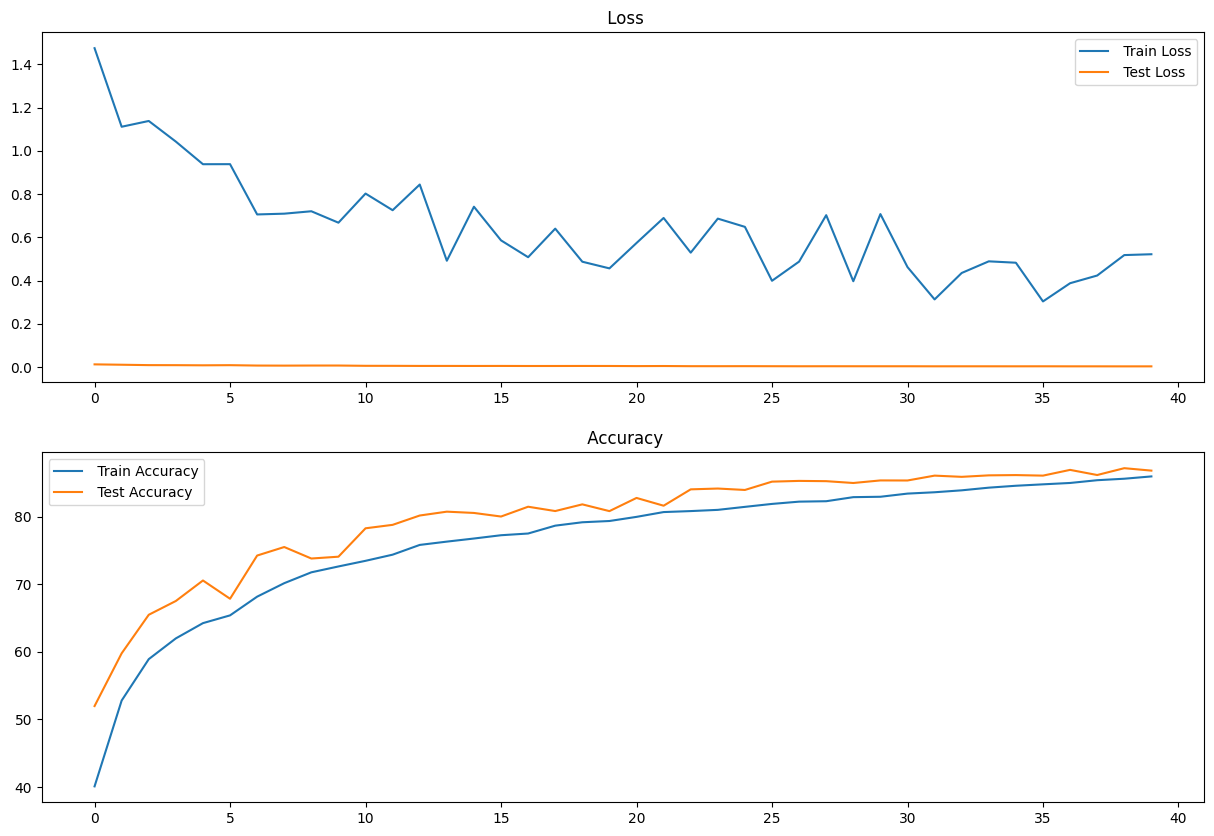

In [14]:
TTE.plotPerformanceGraph()

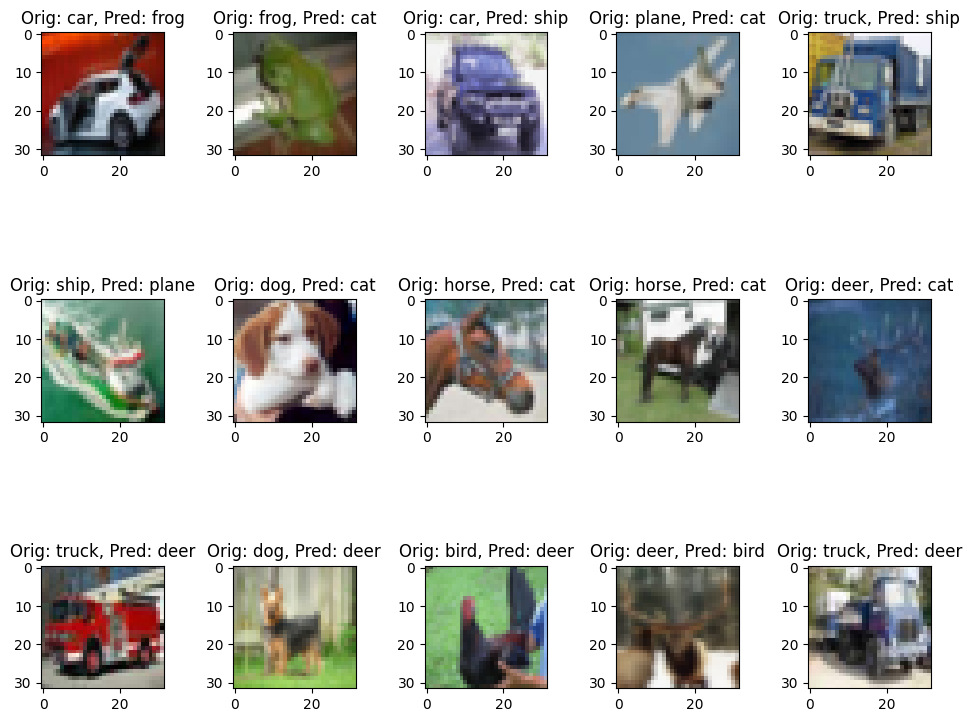

In [15]:
TTE.MissClassifedImage(testloader2,model,device, 15,classes)